<a href="https://colab.research.google.com/github/DimitriLeandro/DA2Group10/blob/main/nn_final_project_part_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(0)

%matplotlib inline
plt.rcParams.update({
  'figure.figsize':  [16, 16],
  'axes.labelsize':  16,
  'axes.titlesize':  18,
  'font.size':       16,
  'legend.fontsize': 10,
  'xtick.labelsize': 12,
  'ytick.labelsize': 12
})

## Downloading and extracting the datasets

In [2]:
!wget https://uni-muenster.sciebo.de/s/bmzyEnwSscZ0tam/download?path=%2F&files=train_set.csv
!unzip -qq /content/download?path=%2F

--2022-06-27 18:41:59--  https://uni-muenster.sciebo.de/s/bmzyEnwSscZ0tam/download?path=%2F
Resolving uni-muenster.sciebo.de (uni-muenster.sciebo.de)... 128.176.4.4
Connecting to uni-muenster.sciebo.de (uni-muenster.sciebo.de)|128.176.4.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘download?path=%2F’

download?path=%2F       [   <=>              ]  36.05M  61.7MB/s    in 0.6s    

2022-06-27 18:42:00 (61.7 MB/s) - ‘download?path=%2F’ saved [37799682]



## Train dataset preprocessing

In [45]:
df = pd.read_csv('/content/task_1/train_set.csv')

encoder = LabelEncoder()
scaler  = StandardScaler()

y = encoder.fit_transform(df['y'])
X = scaler.fit_transform(df.drop('y', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model definition and training

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu', input_dim=(100)),
    keras.layers.Dense(20, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

callbacks = [
  EarlyStopping(
      monitor  = 'val_loss', 
      patience = 10
  ),
  ModelCheckpoint(
      filepath       = 'best_model.h5', 
      monitor        = 'val_loss', 
      save_best_only = True
  )
]

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 20)                1020      
                                                                 
Total params: 6,070
Trainable params: 6,070
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(
    x               = X_train,
    y               = y_train,
    callbacks       = callbacks,
    batch_size      = 256,
    epochs          = 100,
    validation_data = (X_test, y_test)
)

Epoch 1/100
112/112 [==============================] - 1s 8ms/step - loss: 2.1124 - accuracy: 0.4246 - val_loss: 1.1791 - val_accuracy: 0.7859
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 0.7533 - accuracy: 0.8404 - val_loss: 0.5173 - val_accuracy: 0.8657
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8713 - val_loss: 0.3896 - val_accuracy: 0.8730
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3475 - accuracy: 0.8787 - val_loss: 0.3497 - val_accuracy: 0.8736
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8825 - val_loss: 0.3322 - val_accuracy: 0.8780
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.2998 - accuracy: 0.8864 - val_loss: 0.3230 - val_accuracy: 0.8780
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 0.2880 - accuracy: 0.8881 - val_loss: 0.3167 - val_accuracy: 0.8742

## Adding more convolutions

In [51]:
X_train = X_train.reshape(X_train.shape[0], 10, 10, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 10, 10, 1).astype('float32') 

In [53]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='sigmoid', input_shape=(10, 10, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

callbacks = [
  EarlyStopping(
      monitor  = 'val_loss', 
      patience = 10
  ),
  ModelCheckpoint(
      filepath       = 'best_model.h5', 
      monitor        = 'val_loss', 
      save_best_only = True
  )
]

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                16448     
                                                                 
 dense_46 (Dense)            (None, 20)                1300      
                                                                 
Total params: 17,908
Trainable params: 17,908
Non-trainable params: 0
_________________________________________________

In [54]:
history = model.fit(
    x               = X_train,
    y               = y_train,
    callbacks       = callbacks,
    batch_size      = 256,
    epochs          = 100,
    validation_data = (X_test, y_test)
)

Epoch 1/100
112/112 [==============================] - 1s 5ms/step - loss: 2.3781 - accuracy: 0.2313 - val_loss: 2.3190 - val_accuracy: 0.2443
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 2.2797 - accuracy: 0.2402 - val_loss: 2.2256 - val_accuracy: 0.2349
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 2.1267 - accuracy: 0.3050 - val_loss: 1.9844 - val_accuracy: 0.4505
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 1.7927 - accuracy: 0.5080 - val_loss: 1.5726 - val_accuracy: 0.6116
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 1.3877 - accuracy: 0.6548 - val_loss: 1.2032 - val_accuracy: 0.7015
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 1.0629 - accuracy: 0.7116 - val_loss: 0.9347 - val_accuracy: 0.7402
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 0.8424 - accuracy: 0.7642 - val_loss: 0.7627 - val_accuracy: 0.7840

## Model evaluation

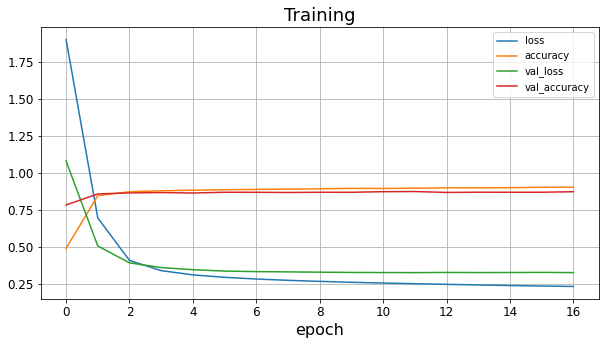

In [ ]:
def plot_history(history, title):
    df = pd.DataFrame(history.history)
    ax = df.plot(figsize=(10,5))
    plt.grid(True)
    ax.set_title(title)
    ax.set_xlabel('epoch')
    plt.show()

plot_history(history, 'Training')

In [ ]:
model          = keras.models.load_model('best_model.h5')
y_pred_encoded = encoder.inverse_transform(model.predict(X_test).argmax(axis=1))
y_test_encoded = encoder.inverse_transform(y_test.argmax(axis=1))
cm             = confusion_matrix(y_test_encoded, y_pred_encoded)

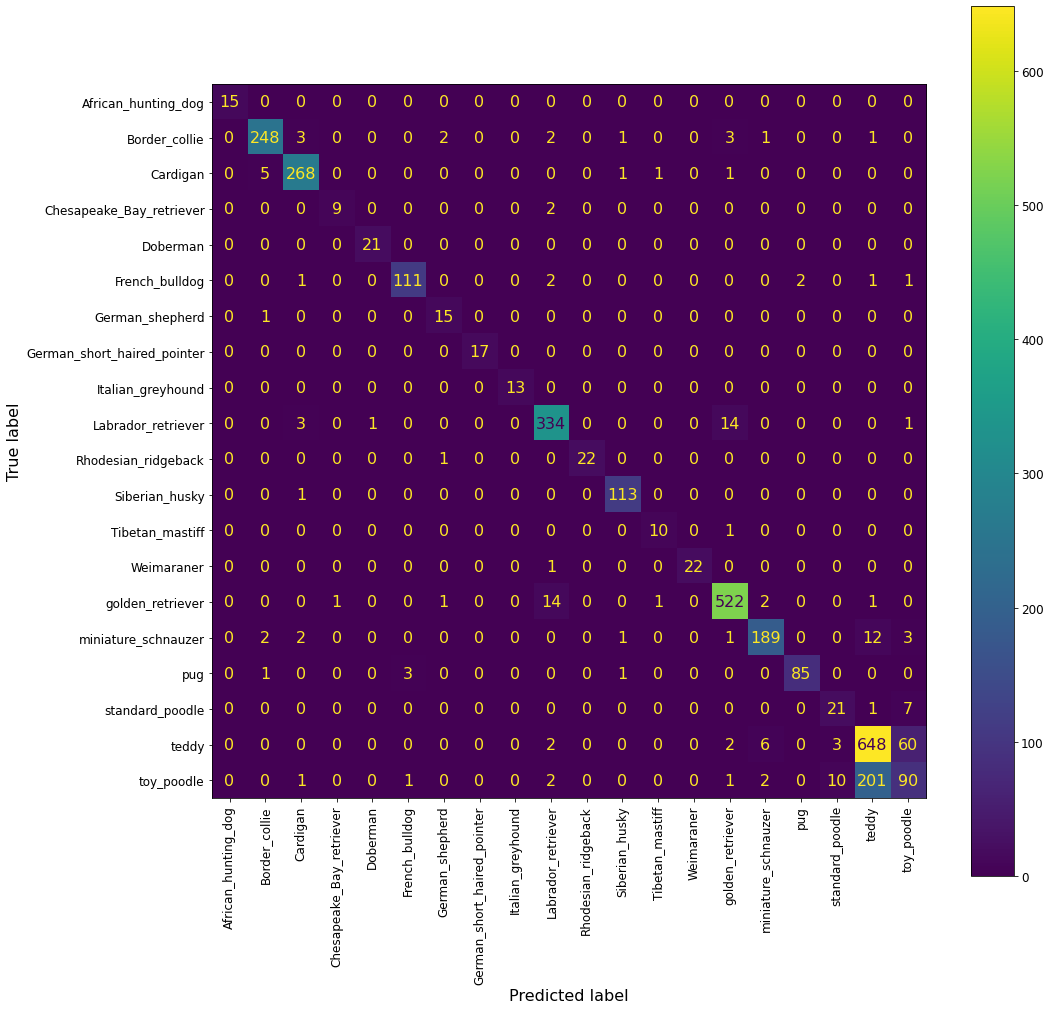

In [ ]:
disp = ConfusionMatrixDisplay(
  confusion_matrix = cm,
  display_labels   = encoder.classes_
)
disp.plot()
plt.xticks(rotation=90)
plt.show()

## Test dataset predictions

In [ ]:
X_test = pd.read_csv('/content/task_1/test_set.csv')
X_test = scaler.transform(X_test)
y_pred_encoded = encoder.inverse_transform(model.predict(X_test).argmax(axis=1))

In [ ]:
with open('predictions_task_1_group_10.txt', 'w') as f:
    for prediction in y_pred_encoded:
        f.write("%s\n" % prediction)